# Plot a map of the salt lakes

In [1]:
import xarray as xr

In [2]:
root = '/network/group/aopp/predict/TIP016_PAXTON_RPSPEEDY/ML4L/ECMWF_files/raw/' 
salt_path = f'{root}saltlakes_max/clake_639l2_yearMAX_saline'

In [3]:
ds= xr.open_dataset(salt_path,engine='cfgrib',backend_kwargs={'indexpath': ''})
ds =  ds.assign_coords({"longitude": (((ds.longitude + 180) % 360) - 180)}) #long3 ---> long1
df = ds.to_dataframe().reset_index()

In [4]:
df = df[df['cl'] != 0.0] #get rid of zero points


In [5]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import cartopy.crs as ccrs
import matplotlib.colors as mc
import matplotlib.colorbar as cb 


def RobinsonPlot(df,z,vmin,vmax,cmap,markersize,savefig,ncircles):


    #Setup plotting env
    fig = plt.figure(figsize=[30,20])
    ax = plt.subplot(projection=ccrs.Robinson(central_longitude=0))
    cax = fig.add_axes([0.32, 0.11, 0.4, 0.0125])

    #Get data
    x = df['latitude']
    y = df['longitude']
    z1 = df[z]
    
    
    #Normalise
    norm = mc.Normalize(vmin=vmin, vmax=vmax)

    #Colorbar
    cb1 = cb.ColorbarBase(cax, cmap=cmap,
                               norm=norm,
                               orientation='horizontal'
                               )
    #Scatter points
    sc = ax.scatter(y,x,transform=ccrs.PlateCarree(),
                    s=markersize,
                    c=cmap(norm(z1)),
                    linewidths=1, 
                    alpha=.7)


    #Latitude cutoffs
    ax.plot([-180,180],[70,70],transform=ccrs.PlateCarree(),c='0.5', linestyle='--')
    ax.plot([-180,180],[-70,-70],transform=ccrs.PlateCarree(),c='0.5', linestyle='--')


    
    #Formatting
    cax.tick_params(labelsize=30)
    cax.set_xlabel(r'$\delta$K',fontsize=34)
    

    ax.coastlines()
    ax.set_aspect('auto') #Force projection aspect ratio
    
    ax.scatter(180,0,c='1',transform=ccrs.PlateCarree(),s=100,alpha=0.1) #invisible point to set plot limits. Hacky, but works OK.
    ax.scatter(-180,0,c='1',transform=ccrs.PlateCarree(),s=100,alpha=0.1) #invisible point to set plot limits. Hacky, but works OK.


    

    if savefig is not None:
        plt.savefig(savefig,bbox_inches='tight', pad_inches=0, dpi=300)    
    
    
    
    

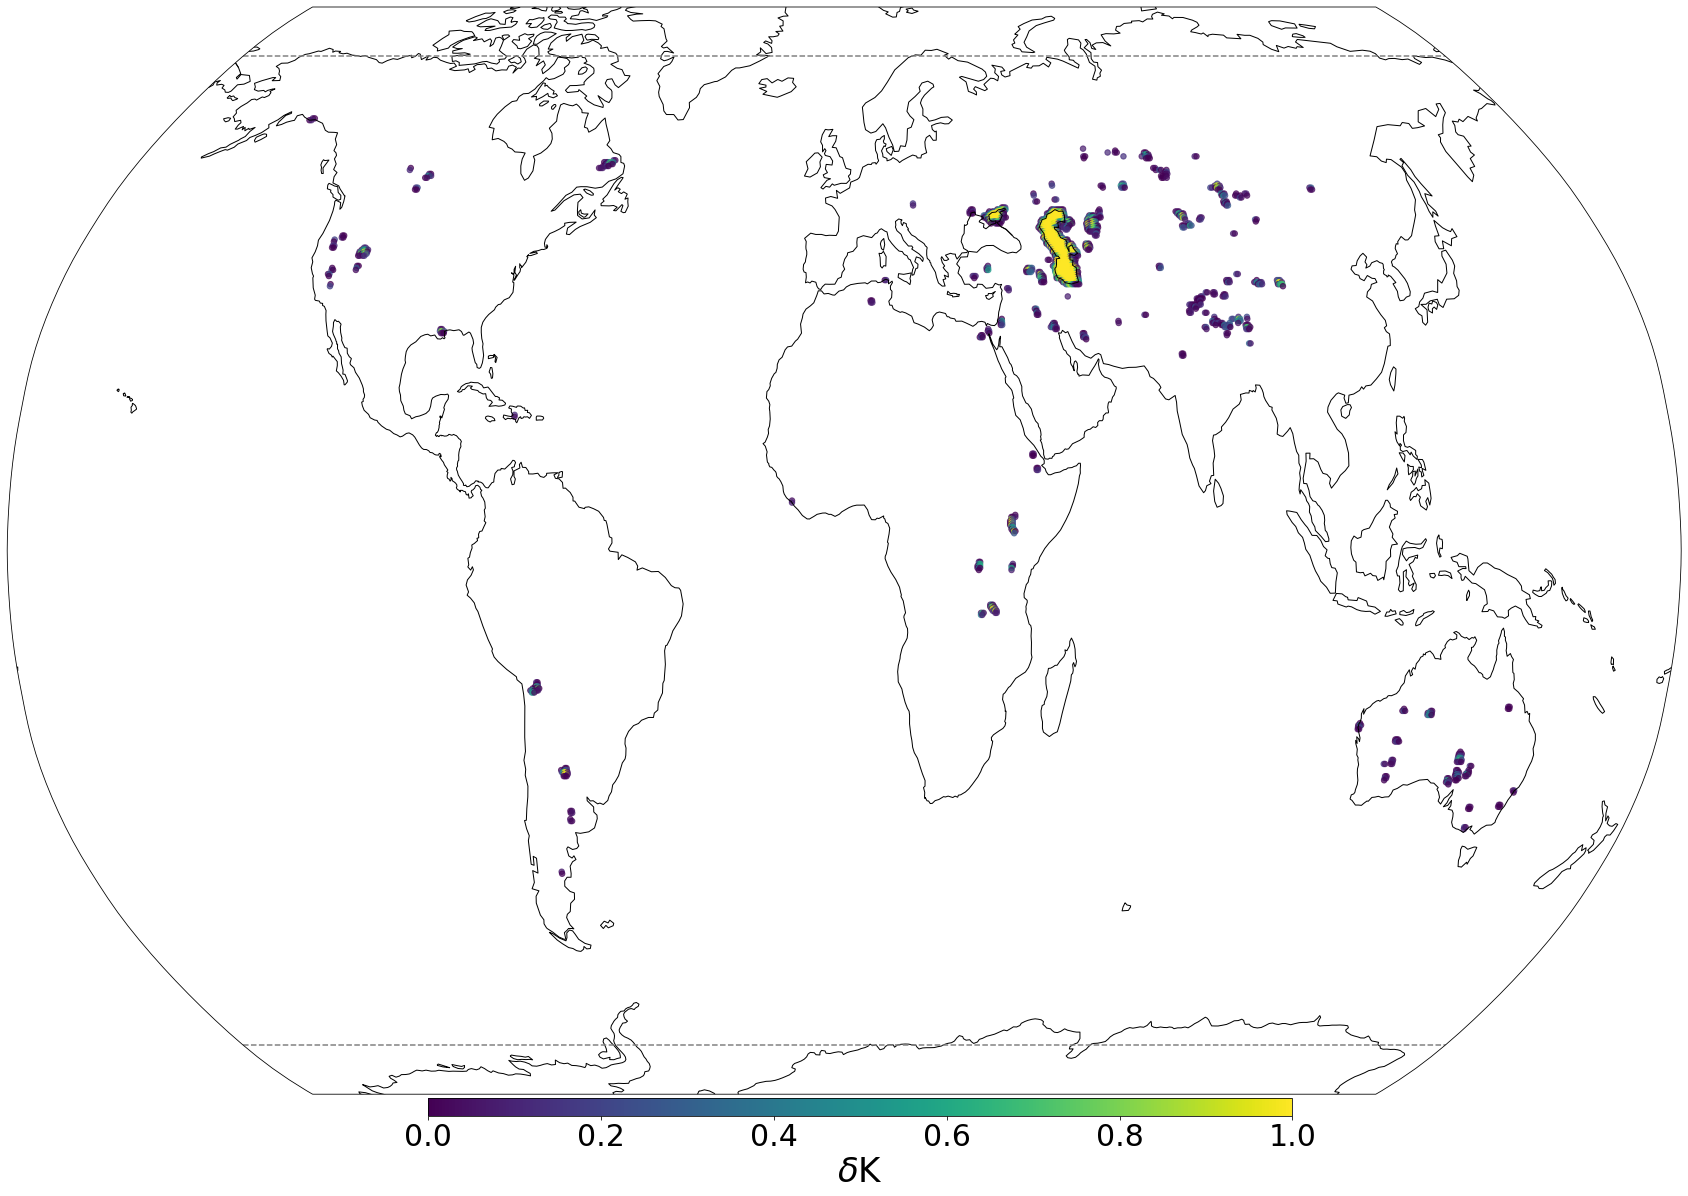

In [6]:
RobinsonPlot(df,'cl',vmin=0,vmax=1,cmap=plt.cm.viridis,markersize = 30,savefig=None,ncircles=None)


In [7]:
def query_point(df,lat,lon):
    
    return df.query(f'latitude == {lat} & longitude == {lon}')
    

In [8]:


lat = -29.367671674745356
lon = 139.6875

query_point(df,lat,lon)

,values,time,step,surface,latitude,longitude,valid_time,cl


,values,time,step,surface,latitude,longitude,valid_time,cl
403225,403225,2011-01-31,0 days,0.0,-29.648702,140.0000,2011-01-31,0.158871
403226,403226,2011-01-31,0 days,0.0,-29.648702,140.3125,2011-01-31,0.000054
405529,405529,2011-01-31,0 days,0.0,-30.210763,140.0000,2011-01-31,0.009721
406670,406670,2011-01-31,0 days,0.0,-30.491793,139.8400,2011-01-31,0.208127
406671,406671,2011-01-31,0 days,0.0,-30.491793,140.1600,2011-01-31,0.011499
407794,407794,2011-01-31,0 days,0.0,-30.772823,139.5200,2011-01-31,0.103446
407795,407795,2011-01-31,0 days,0.0,-30.772823,139.8400,2011-01-31,0.545356
407796,407796,2011-01-31,0 days,0.0,-30.772823,140.1600,2011-01-31,0.001082
408919,408919,2011-01-31,0 days,0.0,-31.053854,139.5200,2011-01-31,0.013560
408920,408920,2011-01-31,0 days,0.0,-31.053854,139.8400,2011-01-31,0.036485


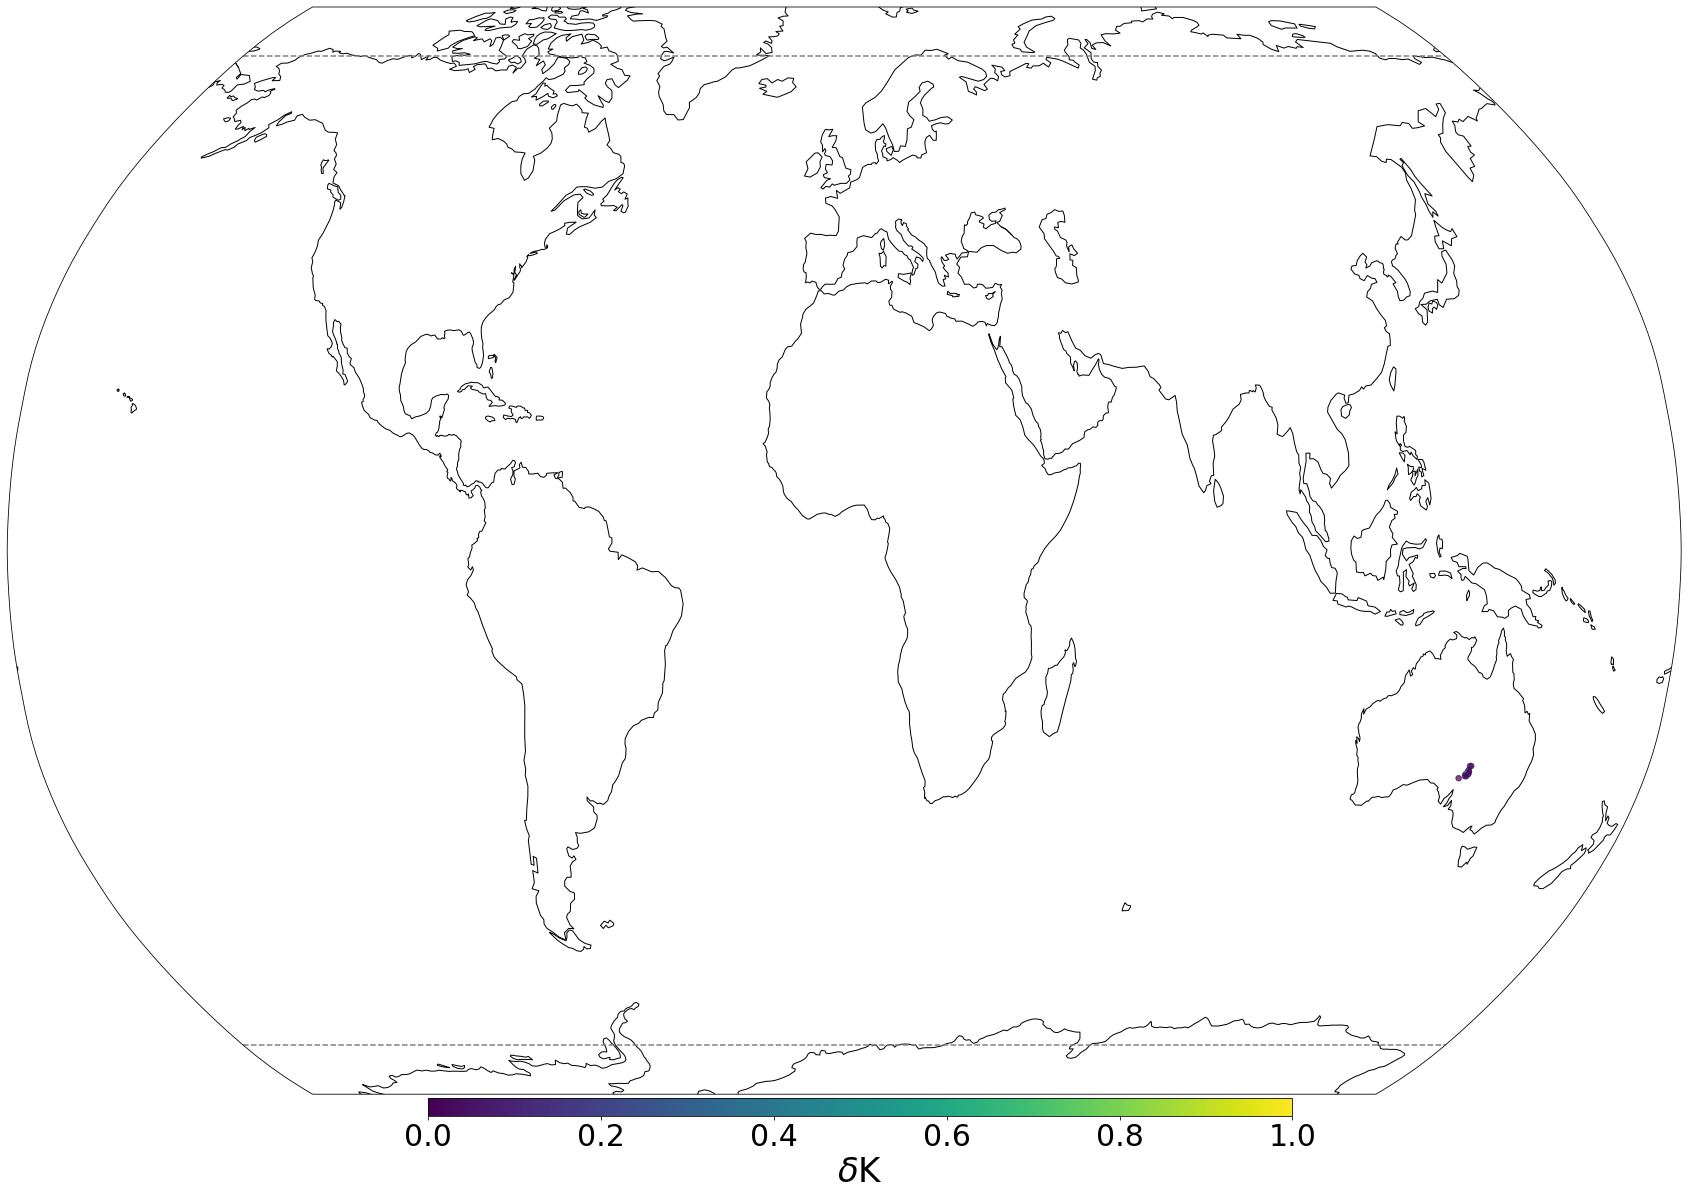

In [13]:
df_selected = df.query(' -32 < latitude < -27 & 138 <longitude<142')
display(df_selected)
RobinsonPlot(df_selected,'cl',vmin=0,vmax=1,cmap=plt.cm.viridis,markersize = 30,savefig=None,ncircles=None)


---

# Plot a map of the monthly maps

In [17]:
import glob
import numpy as np
import pandas as pd

root = '/network/group/aopp/predict/TIP016_PAXTON_RPSPEEDY/ML4L/ECMWF_files/raw/' 
lake_files = sorted(glob.glob(f'{root}BonusClimate/clake*'))

In [36]:

dfs = []
counter = 1
for l in lake_files:
    
    print(l,counter)
    
    ds_lake = xr.open_dataset(l,engine='cfgrib',backend_kwargs={'indexpath': ''})
    df_lake = ds_lake.to_dataframe().reset_index()

    #Create some extra cols
    df_lake['latitude_ERA'] = df_lake['latitude']
    df_lake['longitude_ERA'] = ((df_lake['longitude'] + 180) % 360) - 180 #long3 ---> long1
    df_lake['t'] = counter
    counter += 1
    
    
    dfs.extend([df_lake])
    

/network/group/aopp/predict/TIP016_PAXTON_RPSPEEDY/ML4L/ECMWF_files/raw/BonusClimate/clake_639l2_month01 1
/network/group/aopp/predict/TIP016_PAXTON_RPSPEEDY/ML4L/ECMWF_files/raw/BonusClimate/clake_639l2_month02 2
/network/group/aopp/predict/TIP016_PAXTON_RPSPEEDY/ML4L/ECMWF_files/raw/BonusClimate/clake_639l2_month03 3
/network/group/aopp/predict/TIP016_PAXTON_RPSPEEDY/ML4L/ECMWF_files/raw/BonusClimate/clake_639l2_month04 4
/network/group/aopp/predict/TIP016_PAXTON_RPSPEEDY/ML4L/ECMWF_files/raw/BonusClimate/clake_639l2_month05 5
/network/group/aopp/predict/TIP016_PAXTON_RPSPEEDY/ML4L/ECMWF_files/raw/BonusClimate/clake_639l2_month06 6
/network/group/aopp/predict/TIP016_PAXTON_RPSPEEDY/ML4L/ECMWF_files/raw/BonusClimate/clake_639l2_month07 7
/network/group/aopp/predict/TIP016_PAXTON_RPSPEEDY/ML4L/ECMWF_files/raw/BonusClimate/clake_639l2_month08 8
/network/group/aopp/predict/TIP016_PAXTON_RPSPEEDY/ML4L/ECMWF_files/raw/BonusClimate/clake_639l2_month09 9
/network/group/aopp/predict/TIP016_PA

In [38]:
monthly_maps = pd.concat(dfs)

In [45]:
monthly_maps= monthly_maps.rename(columns={"cl": "clake_monthly_value"})

In [57]:
monthly_maps

,values,time,step,surface,latitude,longitude,valid_time,clake_monthly_value,latitude_ERA,longitude_ERA,t
0,0,2011-01-31,0 days,0.0,89.784877,0.0,2011-01-31,0.0,89.784877,0.0,1
1,1,2011-01-31,0 days,0.0,89.784877,20.0,2011-01-31,0.0,89.784877,20.0,1
2,2,2011-01-31,0 days,0.0,89.784877,40.0,2011-01-31,0.0,89.784877,40.0,1
3,3,2011-01-31,0 days,0.0,89.784877,60.0,2011-01-31,0.0,89.784877,60.0,1
4,4,2011-01-31,0 days,0.0,89.784877,80.0,2011-01-31,0.0,89.784877,80.0,1
...,...,...,...,...,...,...,...,...,...,...,...
542075,542075,2011-01-31,0 days,0.0,-89.784877,260.0,2011-01-31,0.0,-89.784877,-100.0,12
542076,542076,2011-01-31,0 days,0.0,-89.784877,280.0,2011-01-31,0.0,-89.784877,-80.0,12
542077,542077,2011-01-31,0 days,0.0,-89.784877,300.0,2011-01-31,0.0,-89.784877,-60.0,12
542078,542078,2011-01-31,0 days,0.0,-89.784877,320.0,2011-01-31,0.0,-89.784877,-40.0,12


In [62]:
lat = -33.021065936911214
lon = -70.07999999999998
monthly_maps.query(f'-33.03 <= latitude_ERA <= -33 & -70.1 <= longitude_ERA <= -70.0')

,values,time,step,surface,latitude,longitude,valid_time,clake_monthly_value,latitude_ERA,longitude_ERA,t
417264,417264,2011-01-31,0 days,0.0,-33.021066,289.92,2011-01-31,0.001775,-33.021066,-70.08,1
417264,417264,2011-01-31,0 days,0.0,-33.021066,289.92,2011-01-31,0.001796,-33.021066,-70.08,2
417264,417264,2011-01-31,0 days,0.0,-33.021066,289.92,2011-01-31,0.001903,-33.021066,-70.08,3
417264,417264,2011-01-31,0 days,0.0,-33.021066,289.92,2011-01-31,0.001996,-33.021066,-70.08,4
417264,417264,2011-01-31,0 days,0.0,-33.021066,289.92,2011-01-31,0.002900,-33.021066,-70.08,5
417264,417264,2011-01-31,0 days,0.0,-33.021066,289.92,2011-01-31,0.002270,-33.021066,-70.08,6
417264,417264,2011-01-31,0 days,0.0,-33.021066,289.92,2011-01-31,0.002392,-33.021066,-70.08,7
417264,417264,2011-01-31,0 days,0.0,-33.021066,289.92,2011-01-31,0.002621,-33.021066,-70.08,8
417264,417264,2011-01-31,0 days,0.0,-33.021066,289.92,2011-01-31,0.002447,-33.021066,-70.08,9
417264,417264,2011-01-31,0 days,0.0,-33.021066,289.92,2011-01-31,0.001912,-33.021066,-70.08,10


In [48]:
variance_per_gridpoint = monthly_maps.groupby(['latitude','longitude']).std()

In [49]:

lat = -29.367671674745356
lon=    139.6875
variance_per_gridpoint.query(f'latitude == {lat} & longitude == {lon}')

,,values,surface,clake_monthly_value,latitude_ERA,longitude_ERA,t
latitude,longitude,,,,,,
-29.367672,139.6875,0.0,0.0,0.043248,0.0,0.0,3.605551


In [42]:
root = '/network/group/aopp/predict/TIP016_PAXTON_RPSPEEDY/ML4L/ECMWF_files/raw/processed_data/joined_data/'
f=f'{root}2016_MLS.parquet'
df = pd.read_parquet(f,columns=['latitude_ERA','longitude_ERA','time','clake_monthly_value'])

In [44]:
df.groupby(['latitude_ERA','longitude_ERA']).std()

clake_monthly_value
latitude_ERA longitude_ERA                     
-70.117048   -75.75                    0.000000
             -75.00                    0.000000
             -72.00                    0.000000
             -71.25                    0.000000
             -70.50                    0.000000
...                                         ...
 70.117048    168.00                   0.006078
              168.75                   0.056984
              170.25                   0.003734
              171.00                   0.054611
              171.75                   0.016155

[149813 rows x 1 columns]

In [151]:
df

,sp,msl,u10,v10,t2m,aluvp,aluvd,alnip,alnid,istl1,...,z_v20,slor_v20,clake_monthly_value,cl_saline,MODIS_LST,latitude_ERA,longitude_ERA,time,number_of_modis_observations,skt_unnormalised
0,0.319781,-3.312112,-0.272708,-0.433632,-1.281853,-0.540116,-0.530686,-1.221462,-1.287657,0.053567,...,-17.852295,-0.876279,-0.264192,-0.069769,268.034760,54.660397,-163.59375,2016-01-01 00:00:00,3,267.247559
1,0.488203,-3.344310,-1.563556,-0.321791,-0.938681,-0.405089,-0.468140,-1.542488,-1.693358,0.053567,...,-1.275181,-0.013794,-0.263227,-0.069769,272.575195,54.660397,-163.12500,2016-01-01 00:00:00,5,277.714355
2,0.356893,-3.287817,-0.523570,0.267331,-1.176200,-0.585751,-0.564334,-0.857613,-0.884000,0.053567,...,-2.451099,-0.114521,-0.264192,-0.069769,264.893341,54.941427,-163.59375,2016-01-01 00:00:00,1,270.976074
3,0.468569,-3.296013,-1.536535,0.212600,-0.953725,-0.405089,-0.468140,-1.542488,-1.693358,0.053567,...,2.348283,-0.013794,-0.210984,-0.069769,269.294556,54.941427,-163.12500,2016-01-01 00:00:00,1,277.122559
4,0.563676,-3.255912,-1.270628,0.163648,-0.969454,-0.405089,-0.468140,-1.542488,-1.693358,0.053567,...,-0.229546,-0.013794,-0.264192,-0.069769,272.096771,55.222457,-163.12500,2016-01-01 00:00:00,13,277.179199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3011763,0.996274,1.173116,2.265275,0.176417,-1.829187,-0.405095,-0.468147,-1.542491,-1.693358,-12.171152,...,0.134740,-0.013794,-0.264192,-0.069769,258.804779,70.117048,-145.50000,2016-12-31 23:00:00,14,260.710632
3011764,0.985719,1.173702,2.505697,-0.401147,-1.835227,-0.405095,-0.468147,-1.542491,-1.693358,-12.251472,...,0.140643,-0.013794,-0.261306,-0.069769,258.174957,70.117048,-144.75000,2016-12-31 23:00:00,5,260.425476
3011765,0.931810,1.176921,2.693306,-0.782223,-1.882982,-0.405095,-0.468147,-1.542491,-1.693358,-12.772021,...,0.430301,-0.013794,-0.214426,-0.069769,257.600525,70.117048,-144.00000,2016-12-31 23:00:00,22,259.671570
3011766,0.931016,1.164042,2.973031,-1.040240,-1.899964,-0.405095,-0.468147,-1.542491,-1.693358,-13.012979,...,0.102275,-0.013794,-0.252729,-0.069769,258.027435,70.117048,-143.25000,2016-12-31 23:00:00,16,259.351257
